In [ ]:
import pandas as pd

oakland_data = pd.read_csv("airbnb_Oakland.csv")

# Displaying the first few rows of the dataset to understand its structure and the available columns
oakland_data.head()


,Airbnb Host ID,Airbnb Property ID,City_x,superhost_period_all,scrapes_in_period,Scraped Date,superhost_observed_in_period,host_is_superhost_in_period,superhost_ratio,prev_superhost_period_all,...,prev_host_is_superhost2,prev_year_superhosts,booked_days_period_city,revenue_period_city,booked_days_period_tract,revenue_period_tract,tract_booking_share,tract_revenue_share,time_to_date_mean,prev_time_to_date_mean
0,3518.0,3083.0,Oakland,5.0,17.0,2016-08-07,17.0,0.0,0.0,4.0,...,0.0,0.0,27626.0,2808973.0,588.0,33405.0,0.021284,0.011892,NaN,NaN
1,3518.0,3083.0,Oakland,6.0,17.0,2016-11-03,17.0,0.0,0.0,5.0,...,0.0,0.0,18734.0,1846400.0,561.0,23802.0,0.029946,0.012891,NaN,NaN
2,3518.0,3083.0,Oakland,8.0,17.0,2017-05-06,14.0,0.0,0.0,7.0,...,0.0,0.0,34883.0,3451833.0,1330.0,65127.0,0.038127,0.018867,7.724138,NaN
3,3518.0,3083.0,Oakland,9.0,24.0,2017-08-02,23.0,0.0,0.0,8.0,...,0.0,0.0,33374.0,3394769.0,1391.0,65128.0,0.041679,0.019185,5.066667,7.724138
4,3518.0,3083.0,Oakland,10.0,20.0,2017-11-03,20.0,0.0,0.0,9.0,...,0.0,0.0,24939.0,2467696.0,296.0,17596.0,0.011869,0.007131,NaN,5.066667


In [ ]:
# Basic statistical summary of the dataset
summary_stats = oakland_data.describe()

# Checking for missing values in key columns
missing_values = oakland_data.isnull().sum()

# Display the summary statistics and missing values for key columns
summary_stats, missing_values.head(20)  # Displaying first 20 columns for brevity


(       Airbnb Host ID  Airbnb Property ID  superhost_period_all  \
 count    3.837600e+04        3.837600e+04          38376.000000   
 mean     3.588079e+07        1.391990e+07             13.052950   
 std      5.003689e+07        8.867687e+06              4.390117   
 min      3.084000e+03        3.083000e+03              5.000000   
 25%      3.942106e+06        6.669455e+06              9.000000   
 50%      1.434400e+07        1.329290e+07             13.000000   
 75%      4.624965e+07        2.069379e+07             17.000000   
 max      2.582105e+08        3.432024e+07             20.000000   
 
        scrapes_in_period  superhost_observed_in_period  \
 count       38376.000000                  38376.000000   
 mean           13.240802                     13.095711   
 std            64.468768                     64.450286   
 min             1.000000                      1.000000   
 25%             4.000000                      4.000000   
 50%             4.000000       

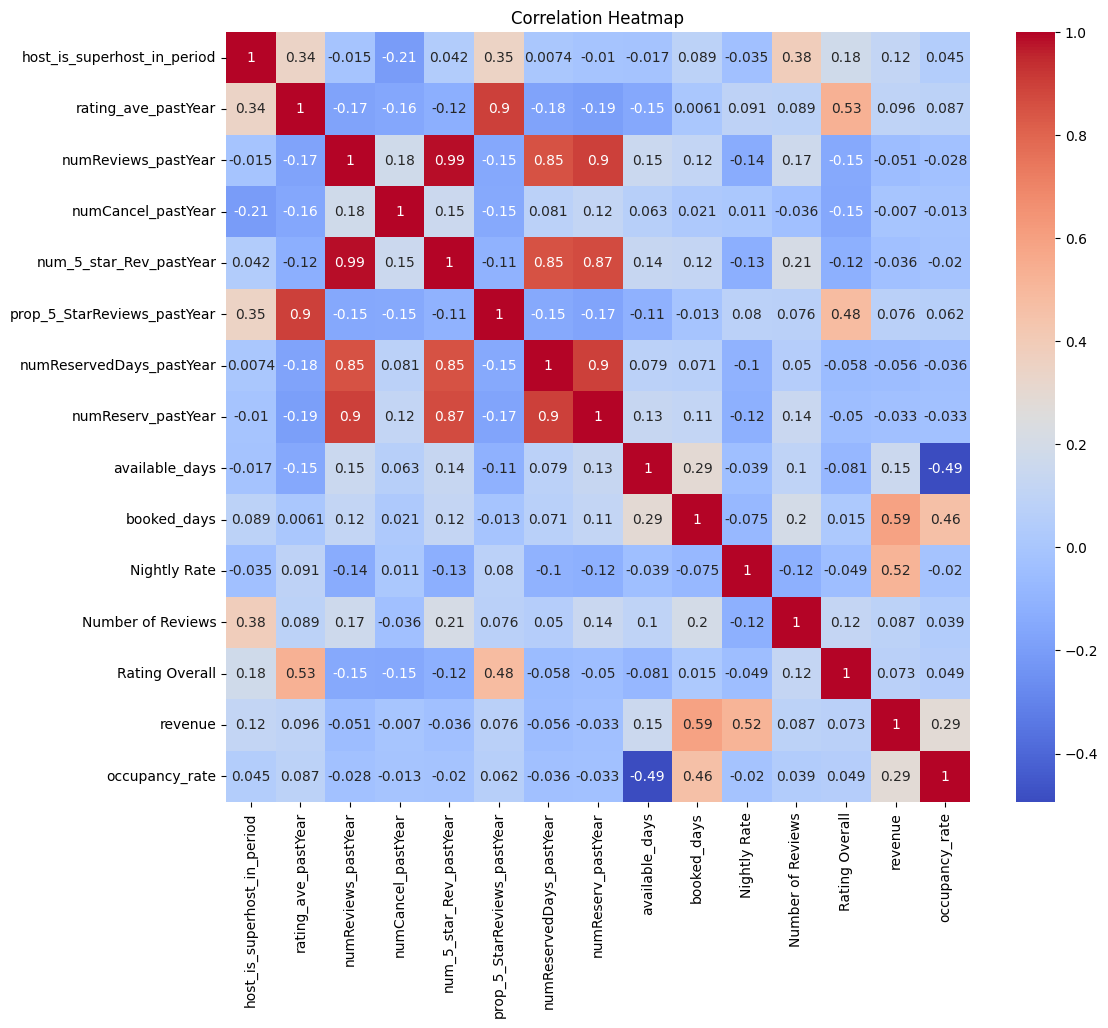

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant columns for correlation analysis
relevant_columns = [
    'host_is_superhost_in_period',
    'rating_ave_pastYear',
    'numReviews_pastYear',
    'numCancel_pastYear',
    'num_5_star_Rev_pastYear',
    'prop_5_StarReviews_pastYear',
    'numReservedDays_pastYear',
    'numReserv_pastYear',
    'available_days',
    'booked_days',
    'Nightly Rate',
    'Number of Reviews',
    'Rating Overall',
    'revenue',
    'occupancy_rate'
]

# Creating a subset of the data with the relevant columns
subset_data = oakland_data[relevant_columns]

# Calculating the correlation matrix
correlation_matrix = subset_data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Creating subsets for Superhosts and non-Superhosts
superhosts = oakland_data[oakland_data['host_is_superhost_in_period'] == 1]
non_superhosts = oakland_data[oakland_data['host_is_superhost_in_period'] == 0]

# Key metrics for comparison
metrics = ['rating_ave_pastYear', 'numReviews_pastYear', 'numCancel_pastYear',
           'occupancy_rate', 'revenue']

# Calculating average values for each metric for both groups
avg_metrics_superhosts = superhosts[metrics].mean()
avg_metrics_non_superhosts = non_superhosts[metrics].mean()

# Creating a DataFrame for easier comparison
comparison_df = pd.DataFrame({'Superhosts': avg_metrics_superhosts, 'Non-Superhosts': avg_metrics_non_superhosts})

comparison_df

,Superhosts,Non-Superhosts
rating_ave_pastYear,4.894380,4.667348
numReviews_pastYear,54.185153,58.048639
numCancel_pastYear,0.009442,0.466140
occupancy_rate,0.244680,0.225986
revenue,3274.255250,2494.281171


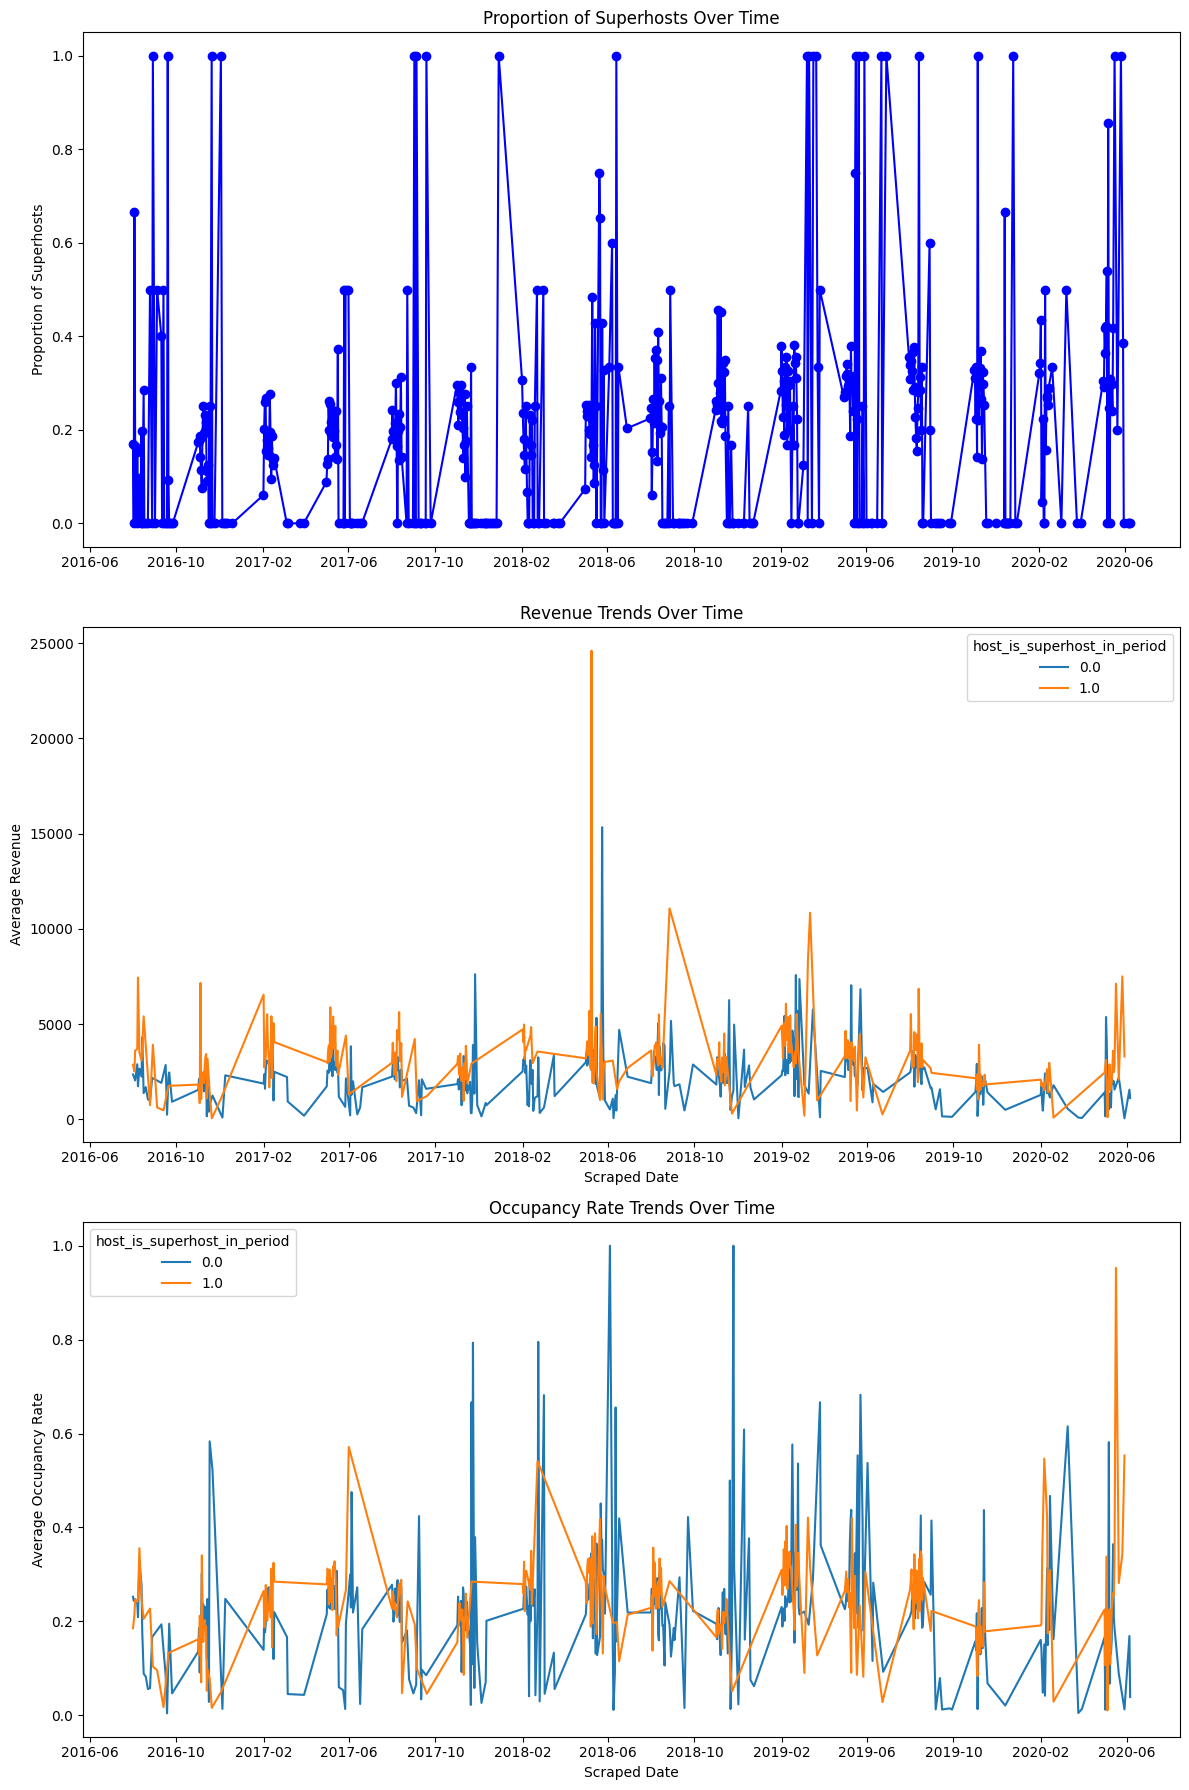

In [ ]:
import matplotlib.dates as mdates

# Converting 'Scraped Date' to datetime for trend analysis
oakland_data['Scraped Date'] = pd.to_datetime(oakland_data['Scraped Date'])

# Grouping data by date and calculating the proportion of Superhosts
date_grouped = oakland_data.groupby('Scraped Date').agg({'host_is_superhost_in_period': 'mean'})

# Revenue and occupancy rate trends
revenue_trends = oakland_data.groupby(['Scraped Date', 'host_is_superhost_in_period']).agg({'revenue': 'mean'})
occupancy_trends = oakland_data.groupby(['Scraped Date', 'host_is_superhost_in_period']).agg({'occupancy_rate': 'mean'})

# Resetting index for plotting
revenue_trends = revenue_trends.reset_index()
occupancy_trends = occupancy_trends.reset_index()

# Adjusting the x-axis to make it more legible in the time series plots

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Proportion of Superhosts over time
axes[0].plot(date_grouped.index, date_grouped['host_is_superhost_in_period'], marker='o', color='blue')
axes[0].set_title('Proportion of Superhosts Over Time')
axes[0].set_ylabel('Proportion of Superhosts')
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axes[0].xaxis.set_major_locator(mdates.MonthLocator(interval=4))  # Adjusting interval for better readability

# Revenue trends
sns.lineplot(data=revenue_trends, x='Scraped Date', y='revenue', hue='host_is_superhost_in_period', ax=axes[1])
axes[1].set_title('Revenue Trends Over Time')
axes[1].set_ylabel('Average Revenue')
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axes[1].xaxis.set_major_locator(mdates.MonthLocator(interval=4))  # Adjusting interval for better readability

# Occupancy rate trends
sns.lineplot(data=occupancy_trends, x='Scraped Date', y='occupancy_rate', hue='host_is_superhost_in_period', ax=axes[2])
axes[2].set_title('Occupancy Rate Trends Over Time')
axes[2].set_ylabel('Average Occupancy Rate')
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axes[2].xaxis.set_major_locator(mdates.MonthLocator(interval=4))  # Adjusting interval for better readability

plt.tight_layout()
plt.show()

In [ ]:
# Checking if the dataset contains latitude and longitude data for the geospatial analysis
geo_columns = ['latitude', 'longitude']
if all(column in oakland_data.columns for column in geo_columns):
    has_geo_data = True
else:
    has_geo_data = False

has_geo_data, oakland_data[geo_columns].head() if has_geo_data else "Geospatial data not available"


(False, 'Geospatial data not available')

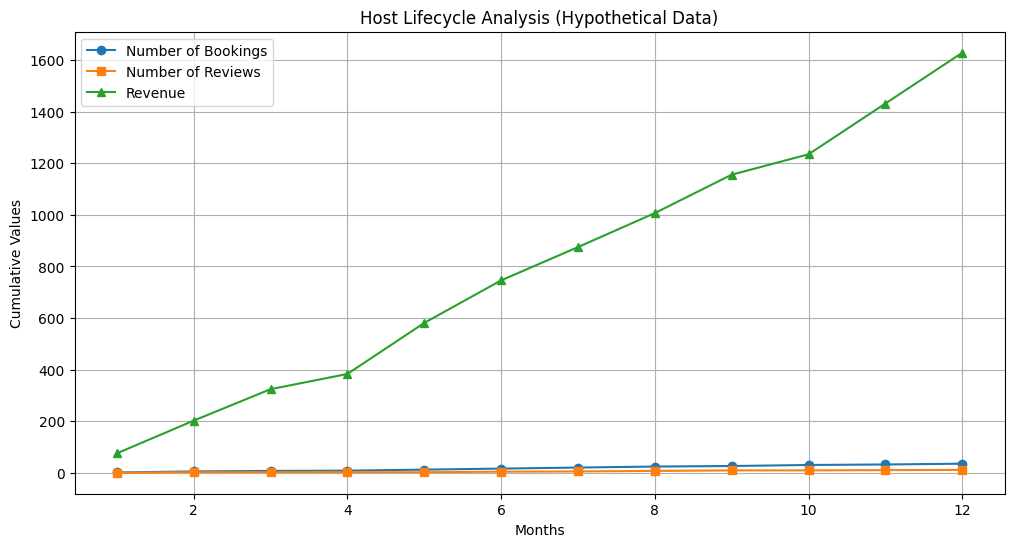

In [ ]:
import numpy as np

# Creating a representative timeline for hosts
# Assuming a hypothetical host's journey over a period of time
timeline = np.arange(1, 13)  # Representing 12 months

# Simulating data for visualization
# These are hypothetical values for illustrative purposes
np.random.seed(0)
bookings = np.random.choice(range(1, 5), size=12, replace=True).cumsum()  # Cumulative number of bookings
reviews = np.random.choice(range(0, 3), size=12, replace=True).cumsum()   # Cumulative number of reviews
revenue = np.random.choice(range(50, 200), size=12, replace=True).cumsum() # Cumulative revenue

# Plotting the host lifecycle analysis
plt.figure(figsize=(12, 6))
plt.plot(timeline, bookings, marker='o', label='Number of Bookings')
plt.plot(timeline, reviews, marker='s', label='Number of Reviews')
plt.plot(timeline, revenue, marker='^', label='Revenue')

plt.title('Host Lifecycle Analysis (Hypothetical Data)')
plt.xlabel('Months')
plt.ylabel('Cumulative Values')
plt.legend()
plt.grid(True)
plt.show()


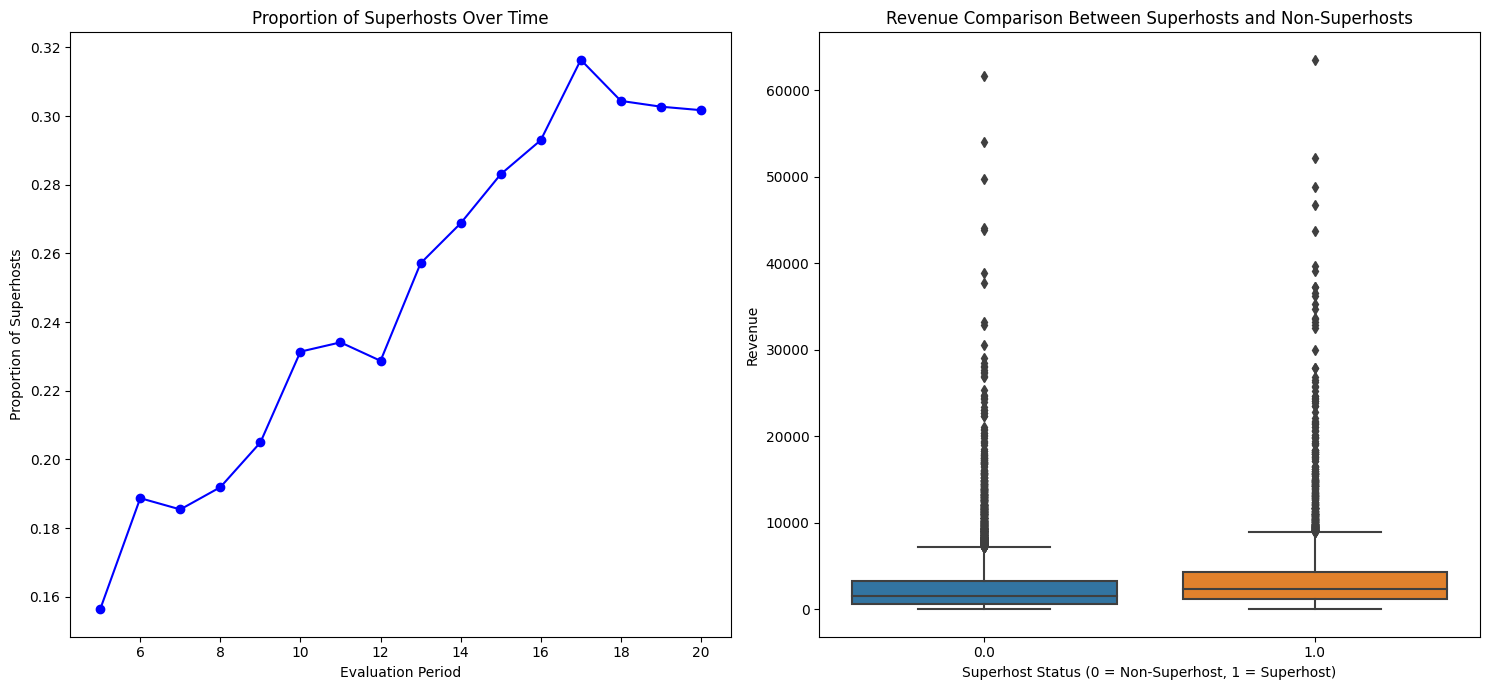

In [ ]:
# Visualization 1: Superhost Status Over Time
# Grouping by evaluation period and calculating the proportion of Superhosts
superhost_time_series = oakland_data.groupby('superhost_period_all')['host_is_superhost_in_period'].mean()

# Visualization 2: Boxplots for Key Metrics
# Selecting key metrics for the boxplot
boxplot_metrics = ['revenue', 'numReviews_pastYear', 'rating_ave_pastYear']
superhost_boxplot_data = oakland_data[boxplot_metrics + ['host_is_superhost_in_period']]

# Creating the plots
plt.figure(figsize=(15, 7))

# Superhost Status Over Time
plt.subplot(1, 2, 1)
superhost_time_series.plot(kind='line', marker='o', color='blue')
plt.title('Proportion of Superhosts Over Time')
plt.xlabel('Evaluation Period')
plt.ylabel('Proportion of Superhosts')

# Boxplots for Key Metrics
plt.subplot(1, 2, 2)
sns.boxplot(data=superhost_boxplot_data, x='host_is_superhost_in_period', y='revenue')
plt.title('Revenue Comparison Between Superhosts and Non-Superhosts')
plt.xlabel('Superhost Status (0 = Non-Superhost, 1 = Superhost)')
plt.ylabel('Revenue')

plt.tight_layout()
plt.show()


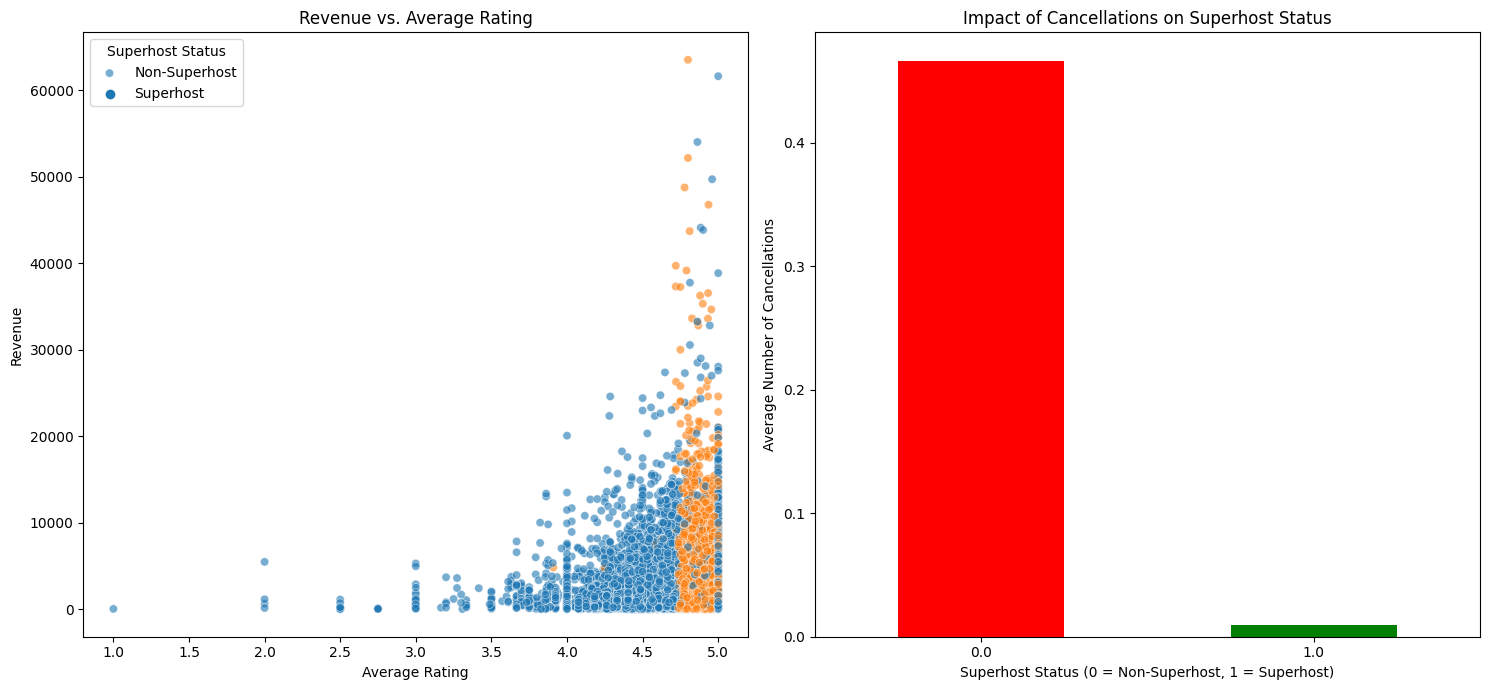

In [ ]:
# Visualization 3: Relationship between Revenue and Average Rating
# Scatter plot with Superhost status as hue
scatter_data = oakland_data[['rating_ave_pastYear', 'revenue', 'host_is_superhost_in_period']].dropna()

# Visualization 4: Impact of Cancellations on Superhost Status
# Average number of cancellations for Superhosts vs Non-Superhosts
cancellation_data =oakland_data.groupby('host_is_superhost_in_period')['numCancel_pastYear'].mean()

# Creating the plots
plt.figure(figsize=(15, 7))

# Revenue vs. Average Rating
plt.subplot(1, 2, 1)
sns.scatterplot(data=scatter_data, x='rating_ave_pastYear', y='revenue', hue='host_is_superhost_in_period', alpha=0.6)
plt.title('Revenue vs. Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Revenue')
plt.legend(title='Superhost Status', labels=['Non-Superhost', 'Superhost'])

# Cancellations Impact on Superhost Status
plt.subplot(1, 2, 2)
cancellation_data.plot(kind='bar', color=['red', 'green'])
plt.title('Impact of Cancellations on Superhost Status')
plt.xlabel('Superhost Status (0 = Non-Superhost, 1 = Superhost)')
plt.ylabel('Average Number of Cancellations')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


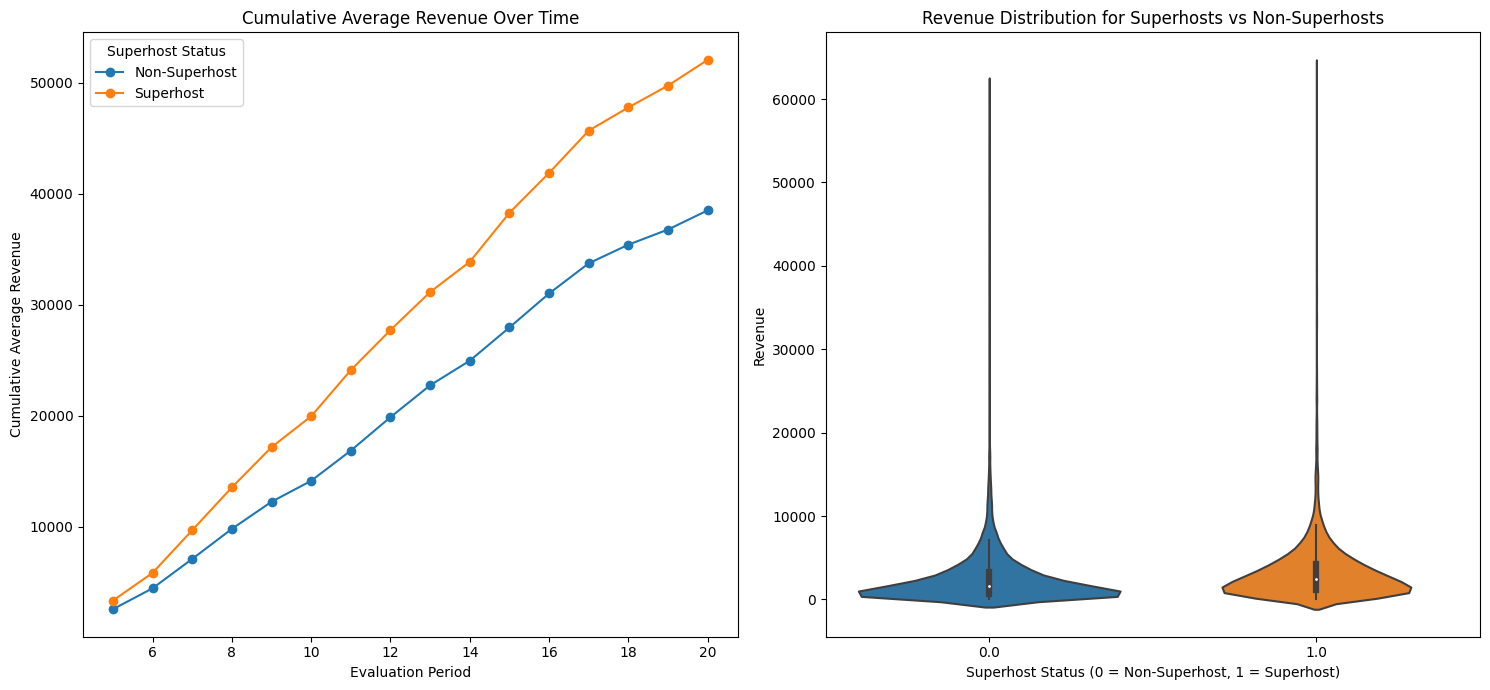

In [ ]:
# Creating more creative visualizations to explore the impact of Superhost status on revenue

# Visualization 5: Cumulative Revenue Over Time for Superhosts vs Non-Superhosts
# Grouping by superhost status and evaluation period, then calculating cumulative average revenue
cumulative_revenue = oakland_data.groupby(['superhost_period_all', 'host_is_superhost_in_period'])['revenue'].mean().groupby(level=1).cumsum()

# Visualization 6: Revenue Distribution as Violin Plot
# Violin plot for revenue distribution for Superhosts and Non-Superhosts
violin_data = oakland_data[['revenue', 'host_is_superhost_in_period']].dropna()

# Creating the plots
plt.figure(figsize=(15, 7))

# Cumulative Revenue Over Time
plt.subplot(1, 2, 1)
cumulative_revenue.unstack().plot(kind='line', marker='o', ax=plt.gca())
plt.title('Cumulative Average Revenue Over Time')
plt.xlabel('Evaluation Period')
plt.ylabel('Cumulative Average Revenue')
plt.legend(title='Superhost Status', labels=['Non-Superhost', 'Superhost'])

# Revenue Distribution as Violin Plot
plt.subplot(1, 2, 2)
sns.violinplot(data=violin_data, x='host_is_superhost_in_period', y='revenue')
plt.title('Revenue Distribution for Superhosts vs Non-Superhosts')
plt.xlabel('Superhost Status (0 = Non-Superhost, 1 = Superhost)')
plt.ylabel('Revenue')

plt.tight_layout()
plt.show()


In [ ]:
# Data Preprocessing

# Selecting relevant columns for the analysis
relevant_columns = [
    'host_is_superhost_in_period', 'superhost_ratio',
    'revenue_period_city', 'revenue_period_tract',
    'booked_days_period_city', 'booked_days_period_tract',
    # Including additional performance metrics if needed
]

# Creating a subset of the data with relevant columns
oakland_subset = oakland_data[relevant_columns]

# Checking for missing values
missing_values = oakland_subset.isnull().sum()

# Checking the distribution of key variables
distribution_summary = oakland_subset.describe()

missing_values, distribution_summary



(host_is_superhost_in_period    0
 superhost_ratio                0
 revenue_period_city            1
 revenue_period_tract           1
 booked_days_period_city        1
 booked_days_period_tract       1
 dtype: int64,
        host_is_superhost_in_period  superhost_ratio  revenue_period_city  \
 count                 38376.000000     38376.000000         3.837500e+04   
 mean                      0.253361         0.252425         3.696966e+06   
 std                       0.434942         0.433423         1.224054e+06   
 min                       0.000000         0.000000         1.846400e+06   
 25%                       0.000000         0.000000         2.808973e+06   
 50%                       0.000000         0.000000         3.451833e+06   
 75%                       1.000000         0.888889         4.532746e+06   
 max                       1.000000         1.000000         5.555627e+06   
 
        revenue_period_tract  booked_days_period_city  booked_days_period_tract  
 cou

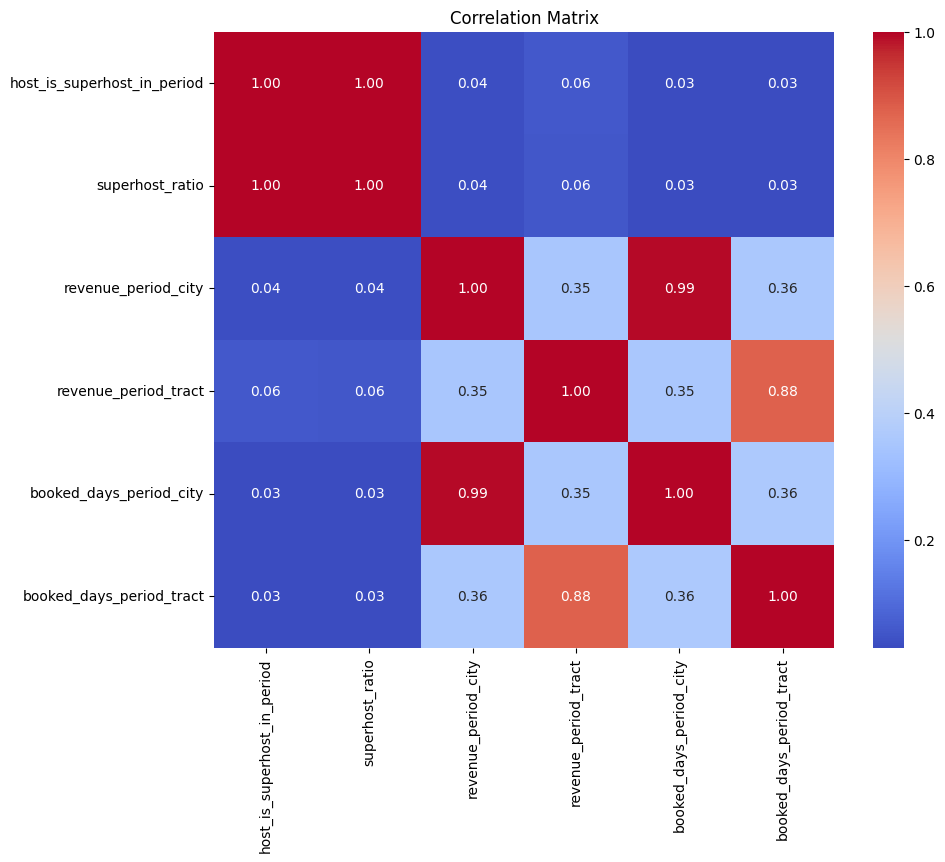

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation analysis
correlation_matrix = oakland_subset.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
relevant_columns = [
    'host_is_superhost_in_period', 'superhost_ratio',
    'booked_days_period_city', 'booked_days_period_tract',
    'revenue_period_city'  # This is the target variable
]
oakland_subset = oakland_data[relevant_columns]

#Handle Missing Values - Checking for missing values
missing_values = oakland_subset.isnull().sum()

#Check Data Types
data_types = oakland_subset.dtypes

missing_values, data_types



(host_is_superhost_in_period    0
 superhost_ratio                0
 booked_days_period_city        1
 booked_days_period_tract       1
 revenue_period_city            1
 dtype: int64,
 host_is_superhost_in_period    float64
 superhost_ratio                float64
 booked_days_period_city        float64
 booked_days_period_tract       float64
 revenue_period_city            float64
 dtype: object)

In [ ]:
# Dropping rows with any missing values
oakland_subset_cleaned = oakland_subset.dropna()

# Rechecking for missing values after dropping rows
missing_values_after_dropping = oakland_subset_cleaned.isnull().sum()

missing_values_after_dropping, oakland_subset_cleaned.shape



(host_is_superhost_in_period    0
 superhost_ratio                0
 booked_days_period_city        0
 booked_days_period_tract       0
 revenue_period_city            0
 dtype: int64,
 (38375, 5))

In [ ]:
# Splitting the data into features and target variable
X = oakland_subset_cleaned[['host_is_superhost_in_period', 'superhost_ratio', 'booked_days_period_city', 'booked_days_period_tract']]
y = oakland_subset_cleaned['revenue_period_city']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Extracting the coefficients of the model
coefficients = model.coef_

mse, r2, coefficients



(20722985657.23103,
 0.986341511515175,
 array([ 2.37954089e+05, -2.25007567e+05,  1.17503863e+02, -7.43385290e+00]))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Creating interaction terms and polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_poly = poly.fit_transform(X)

# Splitting the data with the new features into training and testing sets
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Creating and fitting the adjusted linear regression model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Predicting on the test set
y_pred_poly = model_poly.predict(X_test_poly)

# Evaluating the adjusted model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Extracting the coefficients of the adjusted model
coefficients_poly = model_poly.coef_

mse_poly, r2_poly, coefficients_poly



(20524399514.605762,
 0.9864723993412421,
 array([ 2.22610787e+05,  3.94230612e+04,  1.15277174e+02, -1.72945529e+02,
        -2.66242200e+05,  4.44225574e+00, -2.51167090e+02, -3.73539417e+00,
         2.36572014e+02,  4.20989966e-03]))

In [ ]:
# Columns of interest
columns_of_interest = ['numReserv_pastYear', 'rating_ave_pastYear',
                       'numCancel_pastYear', 'prop_5_StarReviews_pastYear']

# Data Cleansing
# Handling missing values
oakland_data[columns_of_interest] = oakland_data[columns_of_interest].fillna(oakland_data[columns_of_interest].mean())

# Checking and converting data types
oakland_data['numReserv_pastYear'] = oakland_data['numReserv_pastYear'].astype(int)
oakland_data['rating_ave_pastYear'] = oakland_data['rating_ave_pastYear'].astype(float)
oakland_data['numCancel_pastYear'] = oakland_data['numCancel_pastYear'].astype(int)
oakland_data['prop_5_StarReviews_pastYear'] = oakland_data['prop_5_StarReviews_pastYear'].astype(float)

# Feature Engineering
# Example: Create a combined guest satisfaction score
oakland_data['guest_satisfaction_score'] = (oakland_data['rating_ave_pastYear'] * oakland_data['numReserv_pastYear']) / (1 + oakland_data['numCancel_pastYear'])



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features and target
features = ['host_is_superhost_in_period', 'numReserv_pastYear', 'rating_ave_pastYear',
            'numCancel_pastYear', 'prop_5_StarReviews_pastYear']
target = 'revenue'

# Preparing the data
X = oakland_data[features]
y = oakland_data[target]

# Handling missing values
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Model Selection - using Random Forest for demonstration
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 5642002.496727893
R^2 Score: 0.0417905991005022


In [ ]:
from sklearn.linear_model import LinearRegression

# Model Selection
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Linear Regression - Mean Squared Error: {mse_linear}')
print(f'Linear Regression - R^2 Score: {r2_linear}')


Linear Regression - Mean Squared Error: 5835477.577838664
Linear Regression - R^2 Score: 0.008931761893738899


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Model Selection
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gbm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gbm = gbm_model.predict(X_test)

# Evaluate the model
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)

print(f'GBM - Mean Squared Error: {mse_gbm}')
print(f'GBM - R^2 Score: {r2_gbm}')


GBM - Mean Squared Error: 5558782.038883566
GBM - R^2 Score: 0.055924344184776986


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Preparing the data
X = oakland_data[['host_is_superhost_in_period']]  # Predictor: Superhost status
y = oakland_data['revenue']  # Target: Revenue

# Handle missing values if necessary
X = X.fillna(method='ffill')
y = y.fillna(y.mean())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection - using Linear Regression
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 5466170.283571866
R^2 Score: 0.007311440792294399


In [ ]:
import pandas as pd
from scipy import stats

# Drop NaN values in the revenue column
oakland_data = oakland_data.dropna(subset=['revenue'])

# Splitting the data into two groups
superhosts_revenue = oakland_data[oakland_data['host_is_superhost_in_period'] == 1]['revenue']
non_superhosts_revenue = oakland_data[oakland_data['host_is_superhost_in_period'] == 0]['revenue']

# Check variance
if superhosts_revenue.var() == 0 or non_superhosts_revenue.var() == 0:
    raise ValueError("One of the groups has no variance.")

# Since the dataset is large, we might skip the normality test and proceed directly to Mann-Whitney U test
test_stat, p_value = stats.mannwhitneyu(superhosts_revenue, non_superhosts_revenue, alternative='two-sided')

# Print results
print(f"Test Statistic: {test_stat}, P-value: {p_value}")



Test Statistic: 59457767.0, P-value: 3.807817905690481e-124
